In [352]:
import math
import numpy as np
import matplotlib.pyplot as plt




In [353]:
## Si el techo es rectangular y los paneles son todos del mismo tamaño, la cantidad
## de paneles solo depende del area disponible 


def generar_techo(width: int, height: int, ):
    return np.zeros((width,height))


n_paneles = 0
def colocar_panel(techo : np.ndarray, panel_width, panel_height, start_x = 0, start_y = 0, panel_ind=0) :
    tmp = techo.copy()

    for i in range(panel_width):
        for j in range(panel_height):
            if tmp[start_x + i,start_y + j] >= 1:
                #print('panel superpuesto con otro')
                raise Exception

            tmp[start_x + i,start_y + j] = 1 + panel_ind
            


    return tmp

def calculate_panels(panel_width: int, panel_height: int, 
                    roof_width: int, roof_height: int) -> int:
    
    
    # Primero chequeo si el panel cabe en el techo al menos 1 vez probando el panel en ambos sentidos
    a = math.floor(roof_width/panel_width)
    b = math.floor(roof_width/panel_height)
    if a == 0 and b == 0:
        # si el panel no cabe a lo ancho en ninguno de los sentidos no cabe
        # print('no cabe')
        return 0

    c = math.floor(roof_height/panel_width)
    d = math.floor(roof_height/panel_height)
    if c == 0 and d == 0:
        # si el panel no cabe a lo largo en ninguno de los sentidos no cabe
        # print('no cabe')
        return 0

    techo = generar_techo(roof_width,roof_height)
    n = 0

    for i in range(roof_width):
        for j in range(roof_height):

            try:
                techo = colocar_panel(techo, panel_width, panel_height,  i*panel_width, j*panel_height, n)
                n+=1
            except:
                try:
                    techo = colocar_panel(techo, panel_height, panel_width,  i*panel_width, j*panel_height, n)
                    n += 1
                except:
                    pass
            


    return n

r1 = calculate_panels(1,2,2,4)
r2 = calculate_panels(1,2,3,5)
r3 = calculate_panels(2,2,1,10)
r4 = calculate_panels(2,4,6,3)


print( r1, r2, r3, r4)

4 7 0 1


Cantidad de paneles totales:  5


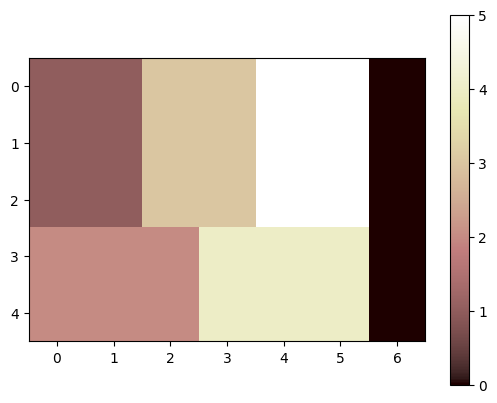

In [360]:
techo_w, techo_h = 7,5

techo = generar_techo(techo_w,techo_h)
panel_w, panel_h = 2,3

a = math.floor(techo_w/panel_w)
b = math.floor(techo_w/panel_h)
c = math.floor(techo_h/panel_w)
d = math.floor(techo_h/panel_h)


n = 0

for i in range(techo_w):
    for j in range(techo_h):

        try:
            techo = colocar_panel(techo, panel_w, panel_h,  i, j, n)
            n+=1
        except:
            try:
                techo = colocar_panel(techo, panel_h, panel_w,  i, j, n)
                n += 1
            except:
                pass
            


techo
print('Cantidad de paneles totales: ', n)
plt.imshow(techo.T, cmap='pink')
plt.colorbar()
plt.show()

5
[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  2  2  2 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  2  2  2 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  2  2  2 -1 -1 -1 -1 -1]
 [-1 -1  3  3  3  3  3  4  4  4  4  4  2  2  2 -1 -1 -1 -1 -1]
 [-1 -1  3  3  3  3  3  4  4  4  4  4  2  2  2 -1 -1 -1 -1 -1]
 [-1 -1  3  3  3  3  3  4  4  4  4  4  0  0  0 -1 -1 -1 -1 -1]
 [-1 -1  5  5  5  5  5  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1  5  5  5  5  5  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1  5  5  5  5  5  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 

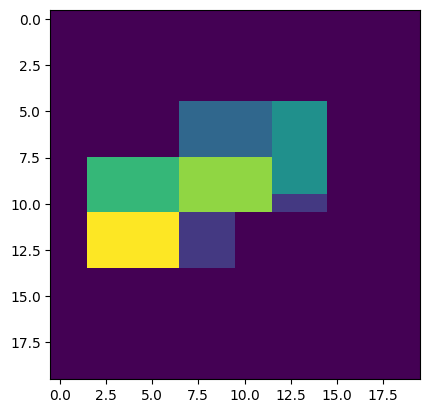

In [355]:
techo = []
def generar_techo_from_img(path:str):
    img_array = plt.imread(path)
    img_array = img_array
    techo = []
    for fila in img_array:
        tmp = []
        for col in fila:
            
            if col[0] == 0:
                tmp.append(-1)
            else:
                tmp.append(0)
        techo.append(tmp)   
    
    techo = np.array(techo)
    return techo


def colocar(techo : np.ndarray, panel_width, panel_height, start_x = 0, start_y = 0, panel_ind=0) :
    tmp = techo.copy()

    for i in range(panel_width):
        for j in range(panel_height):


            if tmp[start_x + i,start_y + j] == 0 :
                #print('celda_añadida')
                tmp[start_x + i,start_y + j]  = panel_ind +1
            else:
                raise Exception()
            

    return tmp

def calcular(panel_width,panel_height, roof : np.ndarray):
    n = 0
    techo = roof.copy()
    roof_width = roof.shape[0]
    roof_height = roof.shape[1]
    for i in range(roof_width):
        for j in range(roof_height):
            #print(i,j)
            try:
                roof =colocar(roof, panel_width, panel_height,  i, j, n)
                n+=1
            except:
                try:
                    roof = colocar(roof, panel_height, panel_width,  i, j, n)
                    n += 1
                except:
                    continue
                
                   
            


    return n, roof
techo = generar_techo_from_img('roof_1.png')


#print(techo)
n= 0
n, techo = calcular(3,5,techo)
print(n)

#techo[1,3] = 22
print(techo)
plt.imshow(techo)